<a href="https://colab.research.google.com/github/Kanyz/Practica_II/blob/main/CUADERNO_ESTADISTICA_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Segunda Parte
Comportamiento de la variable **N_EMB**

### ESTADÍSTICA DESCRIPTIVA PARA VARIABLES CUANTITATIVAS.


*   Gráficos para datos univariables cuantitativas.
*   Determinar las medidas descriptivas para datos univariados cuantitativas.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving nac2022.csv to nac2022.csv


In [ ]:
import pandas as pd
import io
io_csv = io.BytesIO(uploaded['nac2022.csv'])
tabla = pd.read_csv(io_csv, sep = ",", index_col=0, encoding='latin-1')
tabla.head(3)

/tmp/ipython-input-3471368683.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  tabla = pd.read_csv(io_csv, sep = ",", index_col=0, encoding='latin-1')


COD_MUNIC  AREANAC  SIT_PARTO OTRO_SIT  SEXO  PESO_NAC  TALLA_NAC  \
COD_DPTO                                                                      
8               638        1          1      NaN     1         4          4   
11                1        1          1      NaN     1         6          5   
27                1        1          1      NaN     2         6          5   

           ANO  MES  ATEN_PAR  ...  N_HIJOSV  FECHA_NACM  N_EMB  SEG_SOCIAL  \
COD_DPTO                       ...                                            
8         2022   12         1  ...         2  12/10/2015      2           2   
11        2022   12         1  ...         2  12/09/2012      2           1   
27        2022   12         1  ...         4  14/03/2019      4           2   

          IDCLASADMI  EDAD_PADRE  NIV_EDUP  ULTCURPAD  PROFESION  \
COD_DPTO                                                           
8                2.0          29         3          8        1.0   
11               1.0          24         4         11        1.0   
27               2.0          25         3          9        1.0   

          TIPOFORMULARIO  
COD_DPTO                  
8                      1  
11                     1  
27                     1  

[3 rows x 38 columns]

In [ ]:
df = tabla[['N_EMB', 'EDAD_PADRE', 'EDAD_MADRE', 'N_HIJOSV']]
df.head(3)

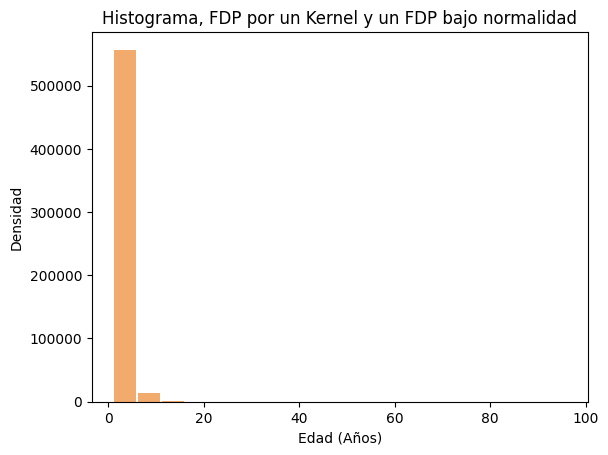

In [ ]:
import matplotlib.pyplot as plot
intervalos = range(min(df.N_EMB),max(df.N_EMB)+1,5)
plot.hist(x=df.N_EMB, bins = intervalos, color="#F2AB6D", rwidth = 0.90)
plt.title("Histograma, FDP por un Kernel y un FDP bajo normalidad")
plt.xlabel("Edad (Años)")
plt.ylabel("Densidad")
plot.show()

la función de densidad de probabilidad estimada mediante un método Kernel junto con la distribución normal , revela de manera visual que la variable número de embarazos no se ajusta a una distribución normal. La curva Kernel, que representa la distribución real de los datos, presenta una forma claramente asimétrica, con una pronunciada concentración de la densidad en los valores bajos de embarazos y una larga cola hacia la derecha. Esto indica que la mayoría de las mujeres reportan un número bajo de embarazos, mientras que son menos frecuentes los casos de mujeres con embarazos numerosos. La curva de distribución normal, por su parte, subestima la frecuencia real de los valores bajos y sobrestima la probabilidad de los valores medios, confirmando la inviabilidad de asumir normalidad para esta variable.

In [ ]:
df1 = df[(df.N_EMB != 99) & (df.EDAD_PADRE <= 100) & (df.EDAD_MADRE != 99) & (df.N_HIJOSV != 99)]
df1.head(5)

N_EMB  EDAD_PADRE  EDAD_MADRE  N_HIJOSV
COD_DPTO                                         
8             2          29           3         2
11            2          24           5         2
27            4          25           3         4
8             4          29           4         2
76            1          21           3         1

/tmp/ipython-input-1477489339.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x,p, "k", linewidth=2, label="Distribución normal", color = "skyblue")


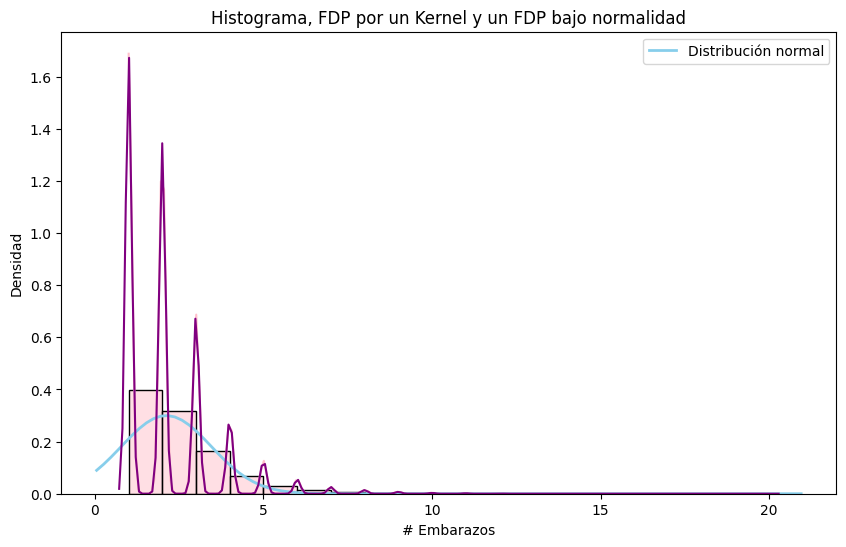

In [ ]:
import seaborn as sns
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

intervalos1 = range(min(df1.N_EMB), max(df1.N_EMB) +1)
plot.figure(figsize=(10,6))
sns.histplot(x = df1.N_EMB, bins = intervalos1, kde=True, stat="density", color = "pink", edgecolor="black")

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf (x, np.mean(df1.N_EMB), np.std(df1.N_EMB))

plt.plot(x,p, "k", linewidth=2, label="Distribución normal", color = "skyblue")

sns.kdeplot(df1.N_EMB, color= "purple")
plt.title("Histograma, FDP por un Kernel y un FDP bajo normalidad")
plt.xlabel("# Embarazos")
plt.ylabel("Densidad")
plt.legend()

plt.show()

Evidencia de forma contundente cómo las frecuencias se acumulan en los primeros niveles de la variable, con una drástica reducción a medida que aumenta el número de embarazos. La marcada discrepancia entre el perfil del histograma y la suave curva normal refuerza la conclusión de la no normalidad. La función de densidad Kernel, que suaviza el histograma, traza un perfil que captura fielmente este comportamiento, caracterizado por un rápido ascenso, un pico agudo y un descenso más gradual, típico de una distribución con sesgo positivo.

In [ ]:
#Prueba de hipótesis.
from scipy.stats import shapiro
shapiro(df1.N_EMB)


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 568273.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=np.float64(0.7748888671075632), pvalue=np.float64(5.41895328207743e-173))

In [ ]:
df1.N_EMB.count()
len(df1.N_EMB)

568273

In [ ]:
idx = np.random.randint(len(df1.N_EMB), size=100)
shapiro(df1.N_EMB.index[idx])



ShapiroResult(statistic=np.float64(0.8787019098477881), pvalue=np.float64(1.5998670076563923e-07))

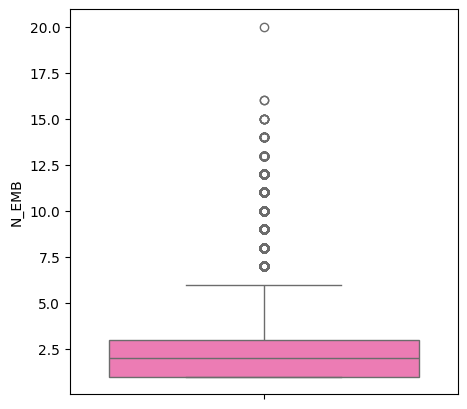

In [ ]:
import seaborn
plt.figure(figsize=(5,5))
sns.boxplot(df1.N_EMB, color = "#ff69b4" , saturation=0.75)
plot.show()

La caja, que contiene el 50% central de los datos, se sitúa en un rango bajo, confirmando que la mediana del número de embarazos se encuentra alrededor de dos. La posición de la mediana dentro de la caja, más cercana al primer cuartil, es un indicador gráfico del sesgo positivo. La presencia de numerosos puntos más allá del bigote superior, considerados valores atípicos, cuantifica visualmente esa "cola larga" ya identificada en las gráficas de densidad, representando a las mujeres con una historia reproductiva significativamente mayor al resto de la población. En conjunto, las tres representaciones ofrecen una descripción robusta y coherente del comportamiento de esta variable.

In [ ]:
import plotly.express as px

plt.figure(figsize=(5,5))
fig = px.strip (df1.N_EMB, orientation= "h")
fig.show()

<Figure size 500x500 with 0 Axes>

El diagrama de puntos muestra que la mayoría de las mujeres ha tenido entre 1 y 4 embarazos. A medida que aumenta el número de embarazos, la frecuencia disminuye, presentándose pocos casos por encima de 10, considerados valores atípicos. La distribución es asimétrica hacia la derecha.

In [ ]:
import numpy as np
from scipy.stats import skew, kurtosis
def calcular_estadisticas(datos):
  media = np.mean(datos)
  varianza = np.var(datos)
  asimetria = skew(datos)
  curtosis = kurtosis(datos)
  return media, varianza, asimetria, curtosis

media, varianza, asimetria, curtosis = calcular_estadisticas(df1.N_EMB)

print(f"Media: {np.mean(df1.N_EMB)}")
print(f"Varianza: {np.var(df1.N_EMB)} y la desviación estándar es de {np.std(df1.N_EMB)}")
print(f"Asimetría: {skew(df1.N_EMB)}")
print(f"Curtosis: {kurtosis(df1.N_EMB)}")

Media: 2.1172499837226124
Varianza: 1.7708665264528558 y la desviación estándar es de 1.3307390903001444
Asimetría: 1.9148272236927293
Curtosis: 5.941746329953286


*   Aproximadamente el promedio de embarazos de las mujeres en la muestra es de 2.117 embarazos.
*   Aproximadamente la distancia entre los valores del número de embarazos y la media es de 1.33 embarazos.
*   La distribución del número de embarazos tiene una asimetría positiva muy marcada (1.91), lo que indica que mientras la mayoría de mujeres tienen pocos embarazos, existen casos con valores sustancialmente más altos que arrastran la media hacia la derecha.
*   La distribución es leptocúrtica (5.94), lo que significa que los datos están altamente concentrados alrededor de la media, pero al mismo tiempo existen datos que representan mujeres con cantidades inusuales de embarazos (tanto bajas como altas)





# Tercera Parte

**Diagrama de dispersión y la recta de regresión para datos bivariados.**

Vamos a determnar si una variable está correlacionada o depende de otra variable.

**En este caso las variables Edad de padres y Numeros de embarazos**

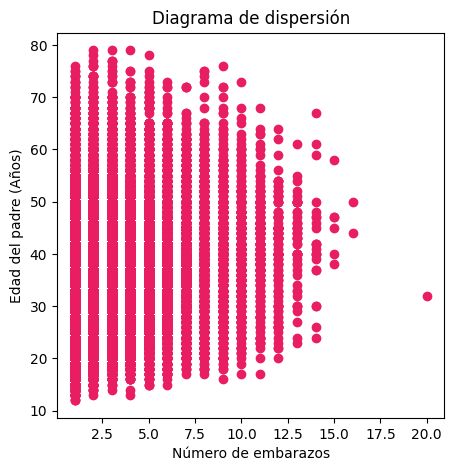

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter (df1['N_EMB'], df1['EDAD_PADRE'], color = "#E91D62", marker = "o")
plt.title("Diagrama de dispersión")
plt.xlabel("Número de embarazos")
plt.ylabel("Edad del padre (Años)")
plt.show()

Se observa en el Diagrama de Dispersión una nube de puntos sin un patrón particular, lo que quiere decir que estas dos variables son independientes o no están correlacionadas. Para este caso específico, quiere decir que el número de embarazos y la edad del padre en Colombia no están relacionadas linealmente, por lo que puede ocurrir que:

* Exista un padre joven con una pareja que han tenido muchos embarazos.  
* Exista un padre mayor con una pareja que han tenido pocos embarazos.

Adicionalmente a simple vista se aprecia que la variabilidad del número de embarazos cambia con la edad del padre: en edades jóvenes (por ejemplo, menores de 25 años) la dispersión es más estrecha (rango limitado de embarazos), mientras que en edades medias y mayores (a partir de 35-40 años) la dispersión se amplía considerablemente, viendo tanto casos de pocos como de muchos embarazos. Esto sugiere heteroscedasticidad (varianza no constante de los residuos), lo que viola un supuesto clave para un modelo de regresión lineal simple.

In [ ]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(np.array(df1["N_EMB"]).reshape(-1,1), np.array(df1["EDAD_PADRE"]).reshape(-1,1))
predicciones = modelo.predict(np.array(df1["N_EMB"]).reshape(-1,1))
predicciones

array([[29.9136116 ],
       [29.9136116 ],
       [33.91580864],
       ...,
       [29.9136116 ],
       [31.91471012],
       [29.9136116 ]])

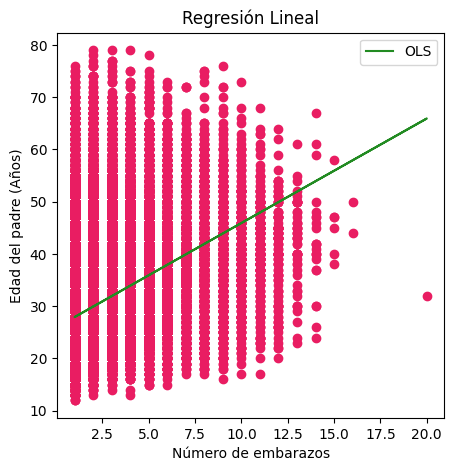

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter (df1['N_EMB'], df1['EDAD_PADRE'], color = "#E91D62", marker = "o")
plt.plot(df1["N_EMB"], predicciones, color = "#228B22", linestyle = "-", label="OLS")
plt.title("Regresión Lineal")
plt.xlabel("Número de embarazos")
plt.ylabel("Edad del padre (Años)")
plt.legend()
plt.show()

Se observa una tendencia lineal positiva entre la edad del padre y el número de embarazos de su pareja, indicando que, en general, a mayor edad del padre, mayor es el número de embarazos reportados. Este comportamiento es esperable, pues con el paso del tiempo los padres mayores pueden haber tenido más oportunidades de experimentar embarazos a lo largo de su vida.

No obstante, se observa una gran dispersión de los puntos alrededor de la recta, lo que indica que la relación no es fuerte ni determinista.Es decir que entre más embarazos tiene la pareja de un hombre en Colombia, más años tiene esta persona.

La variable Número de embarazos (Y) depende positivamente de la variable Edad del padre (X), es decir, entre mayor valor de X se tenga, mayor será el valor de Y.

In [ ]:
import numpy as np
from scipy.stats import spearmanr
from scipy.stats import kendalltau

pearson_corr = np.corrcoef(df1["N_EMB"], df1["EDAD_PADRE"])[0,1]
spearman_corr, _ = spearmanr(df1["N_EMB"], df1["EDAD_PADRE"])
kendall_corr, _ = kendalltau(df1["N_EMB"], df1["EDAD_PADRE"])

print("Los coeficientes de correlación son los siguientes: ")
print(f"Correlación de Pearson: {pearson_corr}")
print(f"Correlación de Spearman: {spearman_corr}")
print(f"Correlación de Kendall: {kendall_corr}")


Los coeficientes de correlación son los siguientes: 
Correlación de Pearson: 0.3439947531478932
Correlación de Spearman: 0.3709074151898444
Correlación de Kendall: 0.2893019807801233


Para la interpretación de los coeficientes de correlación nos ayudaremos de la referencia:
Landis, J. R., & Koch, G. G. (1977). The measurement of observer agreement for categorical data. biometrics, 159-174. [The Measurement of Observer Agreement for Categorical Data](https://2024.sci-hub.st/2153/7a79ed8d1ae20779cbcdf5ab36348bc2/landis1977.pdf)

Teniendo en cuenta las interpretaciones y de acuerdo con los valores obtenidos,los coeficientes se encuentran en el rango de
* $0.2 < \vert \rho (X,Y) \vert = 0.343 < 0.4$
* $0.2 < \vert \eta (X,Y) \vert = 0.370 < 0.4$
* $0.2 < \vert \kappa (X,Y) \vert = 0.289 < 0.4$

lo cual indica una **correlación discreta**.

### Conclusión
Observamos que tenemos 2 analisis de correlaciones, pero con distintas variables ,en ambos análisis tanto el realizado entre **edad del padre y número de hijos**, como el de **edad del padre y número de embarazos**, se observa un **comportamiento similar**, caracterizado por una **correlación positiva débil**. En ambos casos, a mayor edad del padre, tiende a aumentar el número de embarazos o hijos, aunque con alta variabilidad entre los individuos. En conclusión, las variables **no son independientes**, pero mantienen una **relación positiva leve**, coherente con los resultados observados en la regresión lineal.